# Fire Model

In [22]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams.update({'figure.figsize': (8, 6), 'axes.spines.top': False,
                 'axes.spines.right': False, 'axes.labelsize': 14,
                 'axes.titlesize': 16, 'axes.titleweight': 'bold',
                 'lines.linewidth': 3})

## Loading of Results

In [4]:
# Set results path and column names
results_path = '../results/modified_fire_table.csv'
col_names = ['run_number', 'density', 'moore', 'step', 'pct_burned_trees',
             'percolated']

# Read csv then change column names
results = pd.read_csv(results_path, skiprows=6)
results.columns = col_names

## Percolation Probability versus Density

In [10]:
# Get percolation results
percolation_results = (results.groupby(['run_number', 'density', 'moore'],
                                       as_index=False).percolated.max())

### Von Neumann

In [23]:
vn_percolation = percolation_results[percolation_results.moore == False]

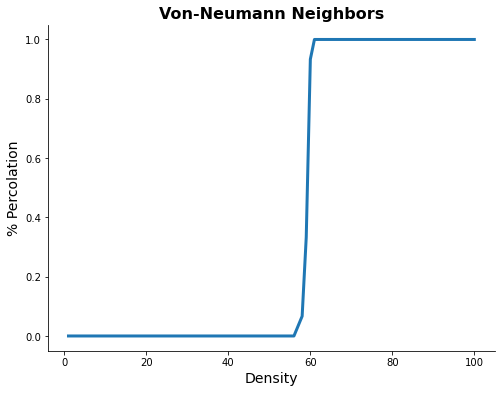

In [40]:
vn_results = vn_percolation.groupby('density').percolated.mean()

ax = vn_results.plot()
ax.set_ylabel("% Percolation")
ax.set_xlabel("Density")
ax.set_title("Von-Neumann Neighbors");

In [33]:
vn_results[57:61].to_frame("% percolation")

,% percolation
density,
58,0.066667
59,0.333333
60,0.933333
61,1.000000


### Moore Neighbors

In [36]:
moore_percolation = percolation_results[percolation_results.moore == True]

In [52]:
moore_percolation.groupby('density').percolated.agg(['mean', 'std'])[35:45]

,mean,std
density,,
36,0.000000,0.000000
37,0.000000,0.000000
38,0.000000,0.000000
39,0.033333,0.182574
40,0.166667,0.379049
41,0.733333,0.449776
42,0.900000,0.305129
43,1.000000,0.000000
44,1.000000,0.000000


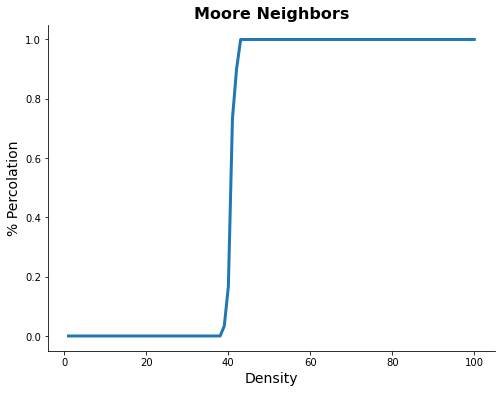

In [41]:
moore_results = moore_percolation.groupby('density').percolated.mean()

ax = moore_results.plot()
ax.set_ylabel("% Percolation")
ax.set_xlabel("Density")
ax.set_title("Moore Neighbors");

In [43]:
moore_results[37:45].to_frame("% percolation")

,% percolation
density,
38,0.000000
39,0.033333
40,0.166667
41,0.733333
42,0.900000
43,1.000000
44,1.000000
45,1.000000


## Percent Burned Trees

In [46]:
# Get burned tree results
bt_results = (results.groupby(['run_number', 'density', 'moore'],
                              as_index=False).pct_burned_trees.max())

### Von Neumann

In [47]:
vn_bt = bt_results[bt_results.moore == False]

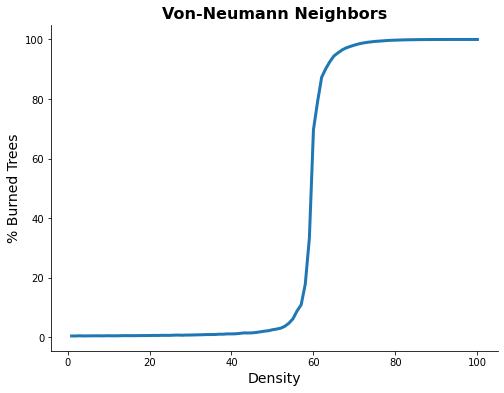

In [48]:
vn_bt_results = vn_bt.groupby('density').pct_burned_trees.mean()

ax = vn_bt_results.plot()
ax.set_ylabel("% Burned Trees")
ax.set_xlabel("Density")
ax.set_title("Von-Neumann Neighbors");

### Moore Neighbors

In [49]:
moore_bt = bt_results[bt_results.moore == True]

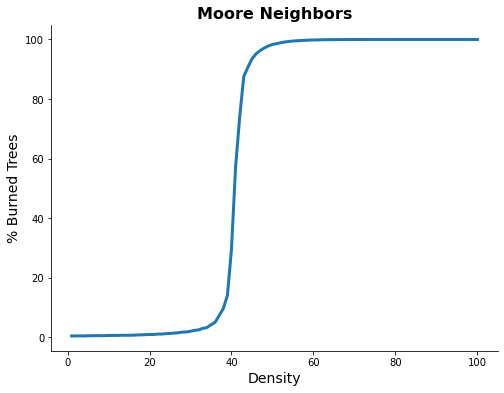

In [50]:
moore_bt_results = moore_bt.groupby('density').pct_burned_trees.mean()

ax = moore_bt_results.plot()
ax.set_ylabel("% Burned Trees")
ax.set_xlabel("Density")
ax.set_title("Moore Neighbors");